Epoch 1/100


/Users/jainigandhi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5020 - mae: 0.8981 - val_loss: 0.6645 - val_mae: 0.6248
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.6966 - mae: 0.6365 - val_loss: 0.6777 - val_mae: 0.6456
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.6740 - mae: 0.6267 - val_loss: 0.6606 - val_mae: 0.6168
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7087 - mae: 0.6418 - val_loss: 0.6591 - val_mae: 0.6092
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.6942 - mae: 0.6363 - val_loss: 0.6645 - val_mae: 0.5953
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.6713 - mae: 0.6176 - val_loss: 0.6825 - val_mae: 0.6437
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.6999 - mae: 0.6298 - val_loss: 0.6564 - val_mae: 0.5999
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.6683 - mae: 0.6174 - val_loss: 0.6565 - val_mae: 0.6178
Epoch 9/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 858u

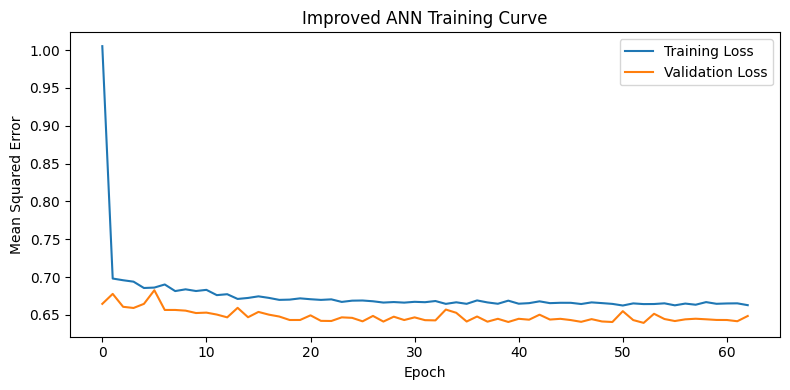

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


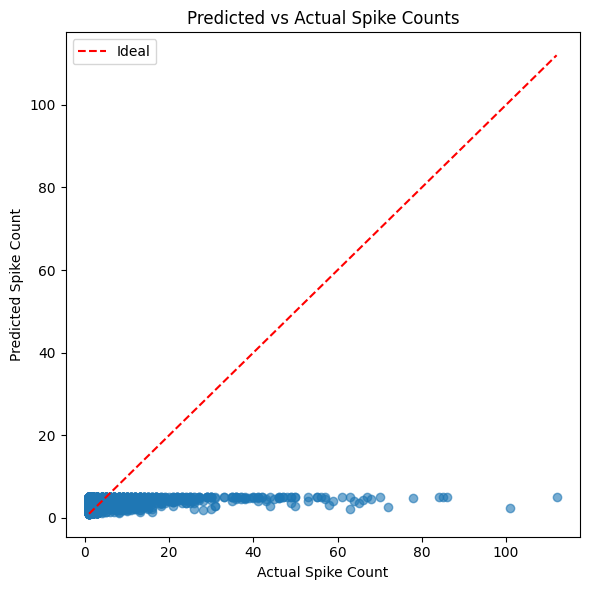


Model Evaluation:
MSE: 112.51205482532536
R2 Score: 0.015906806306805854


In [4]:
# Improved ANN Training Pipeline for Human Neuron Spike Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

# --- Load your dataset ---
df = pd.read_csv("mtg_spikecount_dataset.csv")

# --- Add engineered features ---
df = df[df['num_spikes'] > 0]  # Optional: remove zero-spike sweeps

# New features (mockups based on what's available)
df["log_spike_count"] = np.log1p(df["num_spikes"])  # log-transformed target

# Assume we want to treat 'stimulus_amplitude_pA' as the main feature and also create additional ones for demonstration
# Normally you would extract these from the raw signal, but here we'll simulate

df["stim_amp_scaled"] = df["stimulus_amplitude_pA"] / 1e12  # Convert to nA (example scaling)
df["stim_amp_squared"] = df["stim_amp_scaled"] ** 2

features = ["stim_amp_scaled", "stim_amp_squared"]
X = df[features].values
y = df["log_spike_count"].values  # Target is log spike count

# --- Normalize features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# --- Build Enhanced ANN ---
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output: regression

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# --- Train the model ---
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, verbose=1, callbacks=[early_stop])

# --- Plot Training History ---
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Improved ANN Training Curve")
plt.legend()
plt.tight_layout()
plt.show()

# --- Predictions and Evaluation ---
y_pred = model.predict(X_test).flatten()
y_true = y_test

# Inverse log transform to get back to real spike counts
y_pred_exp = np.expm1(y_pred)
y_true_exp = np.expm1(y_true)

# --- Plot: Predicted vs Actual ---
plt.figure(figsize=(6, 6))
plt.scatter(y_true_exp, y_pred_exp, alpha=0.6)
plt.plot([y_true_exp.min(), y_true_exp.max()],
         [y_true_exp.min(), y_true_exp.max()], 'r--', label="Ideal")
plt.xlabel("Actual Spike Count")
plt.ylabel("Predicted Spike Count")
plt.title("Predicted vs Actual Spike Counts")
plt.legend()
plt.tight_layout()
plt.show()

# --- Print Evaluation Metrics ---
print("\nModel Evaluation:")
print("MSE:", mean_squared_error(y_true_exp, y_pred_exp))
print("R2 Score:", r2_score(y_true_exp, y_pred_exp))
